<a href="https://colab.research.google.com/github/Shrey-Viradiya/ML/blob/master/Practicals/Practical3/Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shrey Viradiya
# 18BCE259

In [1]:
import numpy as np
import sklearn.datasets as skd
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Simple Linear Regression using Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

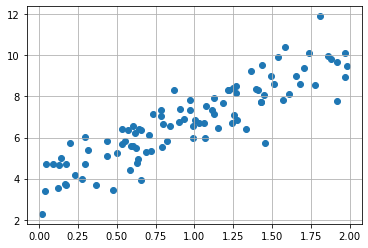

In [3]:
plt.scatter(x = X, y = y)
plt.grid()
plt.show()

Equations for computing Beta coeffs.

$$\beta_1 = \frac {\sum_{i=1}^n (x_i - \bar x )(y_i - \bar y )} {\sum_{i=1}^n (x_i - \bar x )^2} $$


$$ \beta_0 = \bar y - \beta_1 \bar x  $$

In [4]:
X_bar = np.mean(X)
y_bar = np.mean(y)

beta_1 = np.sum((X - X_bar) * (y - y_bar)) / np.sum( np.square(X - X_bar) )
beta_0 = y_bar - (beta_1 * X_bar)

print(f" y = {beta_0} + {beta_1} X")

yp = beta_1 * X + beta_0

 y = 3.813659852208995 + 3.103964745689103 X


In [5]:
mean_absolute_error (y_true= y, y_pred= yp)

0.6956451629140419

In [6]:
mean_squared_error (y_true= y, y_pred= yp)

0.7606743205128547

**Simple and Multiple Linear Regression using Gradient
Descent & Normal Equation Method (without using
sklearn or equivalent library for both)**

### Gradient Descent

In [7]:
X, y = skd.load_boston(return_X_y=True)
X, y = shuffle(X, y, random_state = 259)
X = scale(X)
X_new = np.zeros(shape=(X.shape[0], X.shape[1] + 1))
X_new[:,0] = np.ones(shape = (1,X.shape[0]))
X_new[:,1:] = X
X = X_new

In [79]:
X_train = np.array([[1,630],
                    [1,370],
                    [1,616],
                    [1,700],
                    [1,430],
                    [1,568],
                    [1,1200],
                    [1,2976],
                    ])
y_train = np.array([15.5,7.5,13.9,18.7,8.2,13.2,23.0,87.3])
# X_test = X[400:,:]
# y_test = y[400:]

In [80]:
# epochs
n_iter = 1

# Learning Rate
LR = 0.1

In [83]:
a, b = X_train.shape
thetas = np.array([-5,0.025])

In [84]:
b

2

In [85]:
thetas

array([-5.   ,  0.025])

In [86]:
mse_history = []

In [87]:
for i in range(n_iter):
    update = np.zeros(shape=(b))
    y_predicted = np.dot(X_train, thetas)
    error = y_predicted - y_train
    print(error)
    for f in range(b):
        update[f] = np.sum(error * ((X_train.T)[f]))
    print(update)
    thetas = thetas - (LR/a) * update
    print(thetas)
    mse_history.append(mean_squared_error (y_true= y_train, y_pred= np.dot(X_train, thetas)))

[ -4.75  -3.25  -3.5   -6.2   -2.45  -4.     2.   -17.9 ]
[-4.00500e+01 -6.48869e+04]
[ -4.499375 811.11125 ]


In [78]:
thetas

array([ -143.55988, -8936.17876])

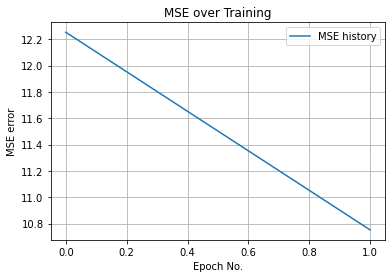

In [50]:
plt.plot(mse_history, label='MSE history')
plt.title("MSE over Training")
plt.ylabel('MSE error')
plt.xlabel('Epoch No.')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
y_tp = np.dot(X_test, thetas)

In [17]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

3.2030742862956347

In [18]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

20.09618797398657

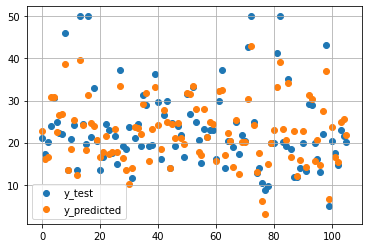

In [19]:
plt.scatter(y = y_test, x = range(len(y_test)), label = 'y_test')
plt.scatter(y = y_tp, x = range(len(y_test)), label = 'y_predicted')
plt.legend()
plt.grid(True)
plt.show()

**Plotting MSE for different Learning Rates**

In [20]:
def run_regressor(n_iter, LR):
    thetas = np.random.uniform(0,1, size = (b))
    mse_history = []
    for i in range(n_iter):
        update = np.zeros(shape=(b))
        y_predicted = np.dot(X_train, thetas)
        error = y_predicted - y_train
        for f in range(b):
            update[f] = np.sum(error * ((X_train.T)[f]))
        thetas = thetas - (LR/(2*a)) * update
        mse_history.append(mean_squared_error (y_true= y_test, y_pred= np.dot(X_test, thetas)))
    return mse_history

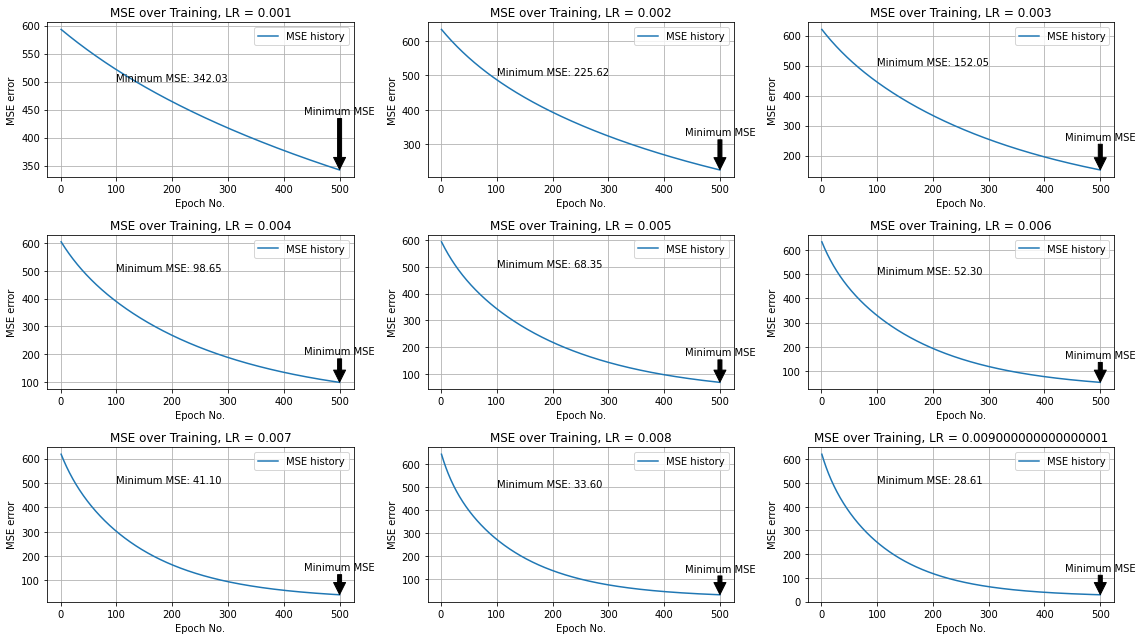

In [21]:
mse_errors = []

for i in np.array(range(1,10)) * 0.001:
    mse_errors.append([i,run_regressor(500,i)])

plt.figure(figsize=(16,9))
for _ in range(1,10):
    plt.subplot(330+_)
    plt.plot(range(1,501),mse_errors[_-1][1], label='MSE history')
    min = np.argmin(mse_errors[_-1][1])
    plt.annotate('Minimum MSE',
             xy=(min+1, mse_errors[_-1][1][min]),
             xytext=(min+1, mse_errors[_-1][1][min] + 100),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.text(100,500,"Minimum MSE: {:.2f}".format(mse_errors[_-1][1][min]))
    plt.title(f"MSE over Training, LR = {mse_errors[_-1][0]}")
    plt.ylabel('MSE error')
    plt.xlabel('Epoch No.')
    plt.grid(True)
    plt.legend()
plt.tight_layout()

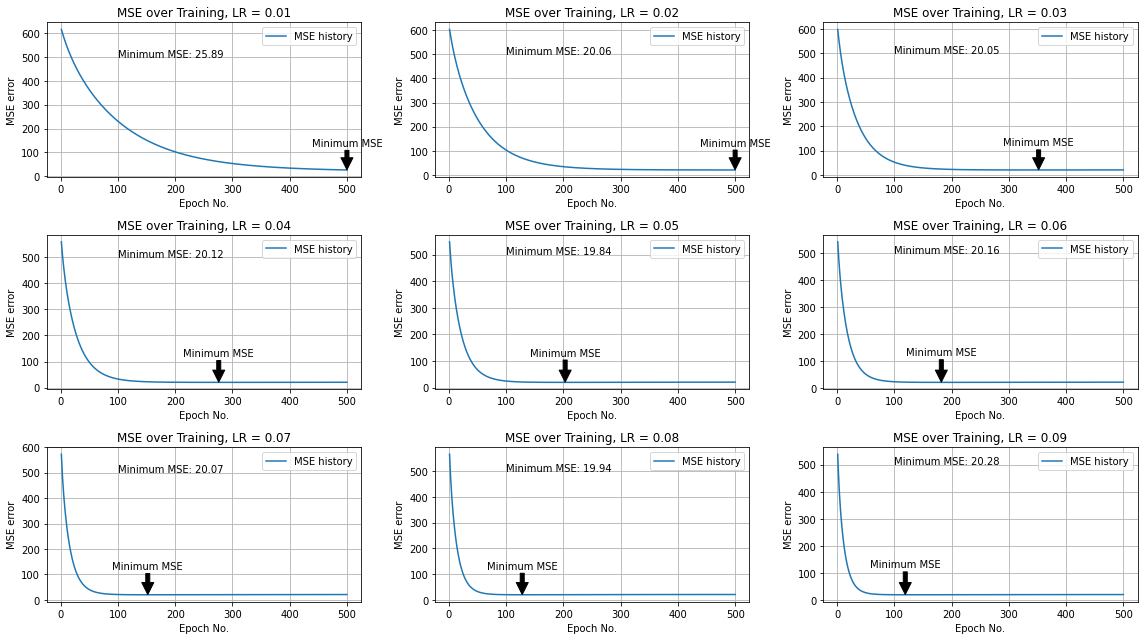

In [22]:
mse_errors = []

for i in np.array(range(1,10)) * 0.01:
    mse_errors.append([i,run_regressor(500,i)])

plt.figure(figsize=(16,9))
for _ in range(1,10):
    plt.subplot(330+_)
    plt.plot(range(1,501),mse_errors[_-1][1], label='MSE history')
    min = np.argmin(mse_errors[_-1][1])
    plt.annotate('Minimum MSE',
             xy=(min+1, mse_errors[_-1][1][min]),
             xytext=(min+1, mse_errors[_-1][1][min] + 100),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.01),
            )
    plt.text(100,500,"Minimum MSE: {:.2f}".format(mse_errors[_-1][1][min]))
    plt.title(f"MSE over Training, LR = {mse_errors[_-1][0]}")
    plt.ylabel('MSE error')
    plt.xlabel('Epoch No.')
    plt.grid(True)
    plt.legend()
plt.tight_layout()

### Normal Equation

Normal Eqaution:
$θ =(X^T X)^{-1} X^T y$

In [23]:
try:
    theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
except np.linalg.LinAlgError as err:
    theta_best = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [24]:
theta_best

array([ 2.24363395e+01, -9.38633399e-01,  1.29137305e+00, -2.18851129e-02,
        4.70397670e-01, -2.20007676e+00,  2.20189803e+00,  1.59982317e-01,
       -3.57394739e+00,  2.43475887e+00, -1.89525645e+00, -2.07767028e+00,
        7.28100149e-01, -4.07689238e+00])

In [25]:
y_tp = np.dot(X_test, theta_best)

In [26]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

3.3014064848117672

In [27]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

20.991388865841085

### Using sklearn (for reference only)

In [28]:
X, y = skd.load_boston(return_X_y=True)
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=259)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
model.intercept_

22.68695395629434

In [31]:
model.coef_

array([-0.69887903,  0.82298118, -0.06685721,  1.01401063, -1.93677242,
        2.95819657,  0.12433842, -3.00398751,  2.30013714, -1.65900611,
       -1.81152753,  0.93327522, -4.05996374])

In [32]:
thetas

array([22.41574879, -0.72228429,  0.90311223, -0.26291815,  0.47659633,
       -1.30745382,  2.62137844,  0.07373991, -2.62074675,  1.31520857,
       -1.00817523, -1.87071629,  0.8024606 , -3.8948185 ])

In [33]:
y_tp = model.predict(X_test)

In [34]:
mean_absolute_error (y_true= y_test, y_pred= y_tp)

3.050983922439426

In [35]:
mean_squared_error (y_true= y_test, y_pred= y_tp)

19.494382645085828

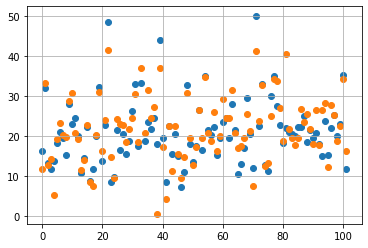

In [36]:
plt.scatter(y = y_test, x = range(len(y_test)))
plt.scatter(y = y_tp, x = range(len(y_test)))
plt.grid(True)
plt.show()